In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kdezero
from kdezero import optimizers
from kdezero import Model
import kdezero.functions as F
import kdezero.layers as L
from kdezero import DataLoader

In [2]:
train_set = kdezero.datasets.Spiral(train=True)
print(len(train_set))
print(train_set[0])
print(np.unique([train_set[i][1] for i in range(len(train_set))]))

300
(array([-0.13981389, -0.00721657], dtype=float32), 1)
[0 1 2]


In [3]:
test_set = kdezero.datasets.Spiral(train=False)
print(len(test_set))
print(test_set[0])

300
(array([0.13246453, 0.13620993], dtype=float32), 0)


In [4]:
batch_size = 30

train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

In [5]:
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

hidden_size = 10
lr = 1.0

model = TwoLayerNet(hidden_size, 3)
optimizer = optimizers.SGD(lr).setup(model)

In [6]:
max_epoch = 100

for epoch in range(max_epoch):
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
    if epoch % 10 == 0:
        print('loss:', loss.data)

loss: 1.1241269
loss: 0.69072944
loss: 0.6441875
loss: 0.4826328
loss: 0.6538841
loss: 0.5422513
loss: 0.52993894
loss: 0.57114255
loss: 0.4440129
loss: 0.41377702


In [7]:
x = np.array([example[0] for example in train_set])
t = np.array([example[1] for example in train_set])
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

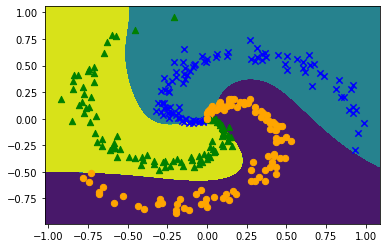

In [8]:
with kdezero.test_mode():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40, marker=markers[c], c=colors[c])
plt.show()